In [1]:
import numpy as np
import pandas as pd
import seaborn as sns

np.__version__, pd.__version__, sns.__version__

('1.19.5', '1.2.4', '0.11.1')

In [3]:
a = np.random.randint(1, 16, size=(4,4))
a

array([[ 4,  2, 11, 14],
       [11,  8, 15,  8],
       [ 6, 10,  6,  2],
       [15,  7,  2, 15]])

In [4]:
np.split(a,2,axis=0) # by default axis=0

[array([[ 4,  2, 11, 14],
        [11,  8, 15,  8]]), array([[ 6, 10,  6,  2],
        [15,  7,  2, 15]])]

In [7]:
A, B = np.split(a,2,axis=1)
A

array([[ 4,  2],
       [11,  8],
       [ 6, 10],
       [15,  7]])

In [8]:
B

array([[11, 14],
       [15,  8],
       [ 6,  2],
       [ 2, 15]])

In [15]:
b = np.concatenate((A,B),axis=1)
a == b

array([[ True,  True,  True,  True],
       [ True,  True,  True,  True],
       [ True,  True,  True,  True],
       [ True,  True,  True,  True]])

In [17]:
all(a.reshape(16,) == b.reshape(16,))

True

In [18]:
A.shape

(4, 2)

In [19]:
B.shape

(4, 2)

In [20]:
b.shape

(4, 4)

In [21]:
a.shape

(4, 4)

In [22]:
all(a == b) # error

ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()

In [23]:
a = np.random.randint(1, 1000, 10000000)
L = list(a)

In [24]:
%timeit L.sort()

1.06 s ± 17.4 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [25]:
%timeit a.sort()

140 ms ± 15.8 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [29]:
a = np.random.randint(1, 100, 20)
a

array([ 7, 16, 90, 17, 99, 65, 82, 24,  9, 99, 81, 16, 63, 73, 32, 42, 16,
       34, 87, 97])

In [30]:
np.sort(a) # returns a new sorted array

array([ 7,  9, 16, 16, 16, 17, 24, 32, 34, 42, 63, 65, 73, 81, 82, 87, 90,
       97, 99, 99])

In [31]:
a

array([ 7, 16, 90, 17, 99, 65, 82, 24,  9, 99, 81, 16, 63, 73, 32, 42, 16,
       34, 87, 97])

In [32]:
a.sort() # sort in-place
a

array([ 7,  9, 16, 16, 16, 17, 24, 32, 34, 42, 63, 65, 73, 81, 82, 87, 90,
       97, 99, 99])

In [37]:
a = np.random.randint(1, 1000, 20)
a

array([441, 985, 841, 167, 829,  19, 170, 486, 630, 366, 263,  33, 590,
       136, 632, 871, 494, 576, 294, 306])

In [38]:
x = np.argsort(a)
x

array([ 5, 11, 13,  3,  6, 10, 18, 19,  9,  0,  7, 16, 17, 12,  8, 14,  4,
        2, 15,  1])

In [39]:
a[x[0]]

19

In [40]:
a[x[19]]

985

In [41]:
a[x]

array([ 19,  33, 136, 167, 170, 263, 294, 306, 366, 441, 486, 494, 576,
       590, 630, 632, 829, 841, 871, 985])

In [45]:
a = np.random.randint(1, 1000, (3,3))
a

array([[172, 295, 198],
       [142, 614, 808],
       [ 49, 373, 330]])

In [46]:
np.sort(a) # equivalent to np.sort(a, axis=-1): we sort each row independently

array([[172, 198, 295],
       [142, 614, 808],
       [ 49, 330, 373]])

In [47]:
np.sort(a, axis=0)

array([[ 49, 295, 198],
       [142, 373, 330],
       [172, 614, 808]])

In [48]:
np.sort(a, axis=None) # we sort the flattened array

array([ 49, 142, 172, 198, 295, 330, 373, 614, 808])

In [51]:
a = np.random.randint(1, 100, 10)
a, np.sort(a)

(array([21, 45, 25, 14, 93, 88, 60, 79, 32, 75]),
 array([14, 21, 25, 32, 45, 60, 75, 79, 88, 93]))

In [54]:
a, np.partition(a, 2) # Number at position 2 is not move, array partitioned after and before

(array([21, 45, 25, 14, 93, 88, 60, 79, 32, 75]),
 array([14, 21, 25, 45, 93, 88, 60, 79, 32, 75]))

In [59]:
x = np.argpartition(a,2)
x

array([3, 0, 2, 1, 4, 5, 6, 7, 8, 9])

In [62]:
a[x[0]], a[x[1]], a[x[2]]

(14, 21, 25)

In [61]:
a[x]

array([14, 21, 25, 45, 93, 88, 60, 79, 32, 75])

In [63]:
# python loop
def compute_square_loop(L):
    L2 = []
    for i in L:
        L2.append(i ** 2)
    return L2

In [64]:
# python list comprehension
def compute_square_compre(L):
    return [i**2 for i in L]

In [65]:
# numpy loop
def compute_square_numpy_loop(a):
    out = np.empty(a.size)
    for i in range(a.size):
        out[i] = a[i]**2
    return out

In [66]:
# numpy vectorized
def compute_square_numpy_vec(a):
    return a**2

In [76]:
import numpy as np
import random
import timeit

size0 = 1000000
print(size0)
L = np.random.randint(0,10,size0)
a = np.array(L)
print(L, a)
%timeit compute_square_loop(L)
%timeit compute_square_compre(L)
%timeit compute_square_numpy_loop(a)
%timeit compute_square_numpy_vec(a) #134 times faster!

1000000


375 ms ± 17 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


351 ms ± 20.5 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


442 ms ± 25.5 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


900 µs ± 48.8 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


In [80]:
#import scipy
#scipy.speciall functions
from scipy import special
special?

<module 'scipy.special' from '/usr/local/lib/python3.8/dist-packages/scipy/special/__init__.py'>

In [81]:
isinstance(np.add, np.ufunc)

True

In [88]:
#help(np.add)
#np.add?
np.info(np.add)

add(x1, x2, /, out=None, *, where=True, casting='same_kind', order='K', dtype=None, subok=True[, signature, extobj])

Add arguments element-wise.

Parameters
----------
x1, x2 : array_like
    The arrays to be added.
    If ``x1.shape != x2.shape``, they must be broadcastable to a common
    shape (which becomes the shape of the output).
out : ndarray, None, or tuple of ndarray and None, optional
    A location into which the result is stored. If provided, it must have
    a shape that the inputs broadcast to. If not provided or None,
    a freshly-allocated array is returned. A tuple (possible only as a
    keyword argument) must have length equal to the number of outputs.
where : array_like, optional
    This condition is broadcast over the input. At locations where the
    condition is True, the `out` array will be set to the ufunc result.
    Elsewhere, the `out` array will retain its original value.
    Note that if an uninitialized `out` array is created via the default
    ``out

In [89]:
np.add.nin, np.exp.nin # number of input arguments

(2, 1)

In [90]:
np.add.nout, np.exp.nout # number of output elements

(1, 1)

In [91]:
np.add.ntypes, np.exp.ntypes # number of supported types

(22, 10)

In [98]:
np.array(np.add.types).reshape(len(np.add.types),) # all possible types combinations

array(['??->?', 'bb->b', 'BB->B', 'hh->h', 'HH->H', 'ii->i', 'II->I',
       'll->l', 'LL->L', 'qq->q', 'QQ->Q', 'ee->e', 'ff->f', 'dd->d',
       'gg->g', 'FF->F', 'DD->D', 'GG->G', 'Mm->M', 'mm->m', 'mM->M',
       'OO->O'], dtype='<U5')

In [99]:
np.sctypeDict['b'], np.sctypeDict['d']

(numpy.int8, numpy.float64)

In [103]:
# return on in-place sort
a = np.random.randint(1, 1000, 1000000)
L = list(a)
%timeit sorted(L) # produces another list
%timeit L.sort # sort in-place, L is sorted once and then it stays sorted
%timeit a.sort # produces another array

383 ms ± 9.97 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


43.5 ns ± 11.8 ns per loop (mean ± std. dev. of 7 runs, 10000000 loops each)


42.1 ns ± 4.6 ns per loop (mean ± std. dev. of 7 runs, 10000000 loops each)


In [110]:
a = np.linspace(1,2,5)
a

array([1.  , 1.25, 1.5 , 1.75, 2.  ])

In [111]:
np.power(a, 2, out=a)

array([1.    , 1.5625, 2.25  , 3.0625, 4.    ])

In [112]:
a

array([1.    , 1.5625, 2.25  , 3.0625, 4.    ])

In [116]:
a = np.linspace(1,10,6)
a

array([ 1. ,  2.8,  4.6,  6.4,  8.2, 10. ])

In [117]:
b = np.linspace(1,10,6)
b

array([ 1. ,  2.8,  4.6,  6.4,  8.2, 10. ])

In [118]:
np.add(a, b, out=b)
a,b

(array([ 1. ,  2.8,  4.6,  6.4,  8.2, 10. ]),
 array([ 2. ,  5.6,  9.2, 12.8, 16.4, 20. ]))

In [131]:
a = np.linspace(1,10,4)
b = np.zeros(8)
a,b

(array([ 1.,  4.,  7., 10.]), array([0., 0., 0., 0., 0., 0., 0., 0.]))

In [132]:
np.power(a, 3, out=b[::2])
a,b

(array([ 1.,  4.,  7., 10.]),
 array([   1.,    0.,   64.,    0.,  343.,    0., 1000.,    0.]))

In [182]:
L = [random.randint(0,10) for i in range(1000000)]

In [183]:
%timeit [x**5.3 for x in L]

117 ms ± 2.64 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [184]:
a = np.array(L, dtype=np.float64)

In [185]:
%timeit np.exp(a)

2.65 ms ± 72 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [186]:
%timeit np.exp(a, out=a)

<magic-timeit>:1: RuntimeWarning: overflow encountered in exp


6.42 ms ± 346 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [144]:
a = np.linspace(1,10,10)
np.square.at(a, [1, 3]) # unary ufunc
a

array([ 1.,  4.,  3., 16.,  5.,  6.,  7.,  8.,  9., 10.])

In [151]:
b = np.ones(2)
np.add.at(a, [1, 3], b) # binary ufunc
a,b

(array([ 1.,  7.,  3., 19.,  5.,  6.,  7.,  8.,  9., 10.]), array([1., 1.]))

In [152]:
a = np.linspace(1,10,5)
a

array([ 1.  ,  3.25,  5.5 ,  7.75, 10.  ])

In [153]:
np.square.at(a, [3,4])
a

array([  1.    ,   3.25  ,   5.5   ,  60.0625, 100.    ])

In [155]:
a = np.linspace(1,10,5)
np.square.at(a, slice(0,len(a)))
a

array([  1.    ,  10.5625,  30.25  ,  60.0625, 100.    ])

In [188]:
a = np.array(range(10))
a

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [189]:
np.add.reduce(a)

45

In [190]:
a

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [191]:
np.add.accumulate(a)

array([ 0,  1,  3,  6, 10, 15, 21, 28, 36, 45])

In [0]:
# np.add.reduce is equivalent to np.sum
# np.add.accumulate is equivalent to np.cumsum
# np.multiply.reduce is equivalent to np.prod
# np.multiply.accumulate is equivalent to np.cumprod

In [195]:
np.power.outer(np.arange(1,10),np.arange(1,3)).T

array([[ 1,  2,  3,  4,  5,  6,  7,  8,  9],
       [ 1,  4,  9, 16, 25, 36, 49, 64, 81]])

In [196]:
np.multiply.outer(np.arange(1,10),np.arange(1,10))

array([[ 1,  2,  3,  4,  5,  6,  7,  8,  9],
       [ 2,  4,  6,  8, 10, 12, 14, 16, 18],
       [ 3,  6,  9, 12, 15, 18, 21, 24, 27],
       [ 4,  8, 12, 16, 20, 24, 28, 32, 36],
       [ 5, 10, 15, 20, 25, 30, 35, 40, 45],
       [ 6, 12, 18, 24, 30, 36, 42, 48, 54],
       [ 7, 14, 21, 28, 35, 42, 49, 56, 63],
       [ 8, 16, 24, 32, 40, 48, 56, 64, 72],
       [ 9, 18, 27, 36, 45, 54, 63, 72, 81]])

np.sum, np.prod, np.mean, np.std,
np.var, np.min, np.max, np.median,
np.percentile
np.argmax, np.argmin
np.all, np.any

In [198]:
a = np.random.randint(1, 10, 10)

In [199]:
np.min(a), np.max(a), np.mean(a), np.std(a)

(1, 9, 5.8, 2.2715633383201093)

In [201]:
a = np.random.randint(1, 10, 100)
a

array([8, 2, 9, 1, 8, 6, 9, 5, 9, 9, 5, 3, 4, 1, 3, 2, 3, 5, 9, 4, 7, 3,
       6, 3, 6, 8, 7, 2, 9, 6, 6, 1, 1, 1, 7, 3, 6, 9, 7, 5, 2, 6, 5, 2,
       6, 2, 6, 8, 7, 3, 3, 3, 4, 6, 3, 5, 1, 7, 4, 7, 3, 1, 8, 2, 8, 2,
       4, 5, 2, 1, 6, 7, 1, 2, 2, 9, 9, 7, 1, 3, 2, 2, 5, 9, 5, 4, 7, 1,
       2, 4, 9, 1, 4, 3, 6, 3, 9, 4, 7, 6])

In [202]:
np.percentile(a, 25), np.percentile(a, 75)

(2.0, 7.0)

In [203]:
a = np.random.randint(1, 10, size=(5,5))
a

array([[4, 6, 6, 3, 2],
       [9, 5, 8, 2, 3],
       [4, 7, 3, 4, 6],
       [4, 3, 4, 2, 1],
       [7, 2, 6, 9, 8]])

In [204]:
np.sum(a, axis=0)

array([28, 23, 27, 20, 20])

In [205]:
np.sum(a, axis=1)

array([21, 27, 24, 14, 32])

In [206]:
np.sum(a) #equivalent to np.sum(a, axis=None)

118

In [207]:
a = [True for x in range(100000)]
%timeit all(a) # Python all is faster on list

380 µs ± 6.09 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


In [208]:
%timeit np.all(a) # numpy.all is the slowest on list

3.24 ms ± 98.7 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [209]:
b = np.array(a)
b

array([ True,  True,  True, ...,  True,  True,  True])

In [210]:
%timeit all(b) # Python all in slower on arrays
%timeit np.all(b) # numpy.all is the fastest on arrays

1.39 ms ± 20.6 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


6.74 µs ± 228 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)


In [211]:
x1 = np.arange(1, 1_000)
x2 = np.arange(1, 1_000)
x3 = x1 + 0.00001 * np.random.rand() # testing is often done through np.all

In [212]:
np.all(x1 == x2)

True

In [213]:
np.array_equal(x1, x2)

True

In [214]:
%timeit np.array_equal(x1, x2)
%timeit np.all(x1 == x2)

4.51 µs ± 408 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)


4.16 µs ± 307 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)


In [215]:
np.all(np.isclose(x1, x3))

True

# Broadcasting

In [217]:
a = np.arange(5)
a

array([0, 1, 2, 3, 4])

In [218]:
b = np.arange(5)
b

array([0, 1, 2, 3, 4])

In [219]:
a + b

array([0, 2, 4, 6, 8])

In [220]:
a + 10


array([10, 11, 12, 13, 14])

In [223]:
a = np.arange(3)
b = np.arange(2)
a = a.reshape(1, 3) # or a[np.newaxis, :]
b = b.reshape(2, 1) # or b[:, np.newaxis]
a.shape, b.shape

((1, 3), (2, 1))

In [224]:
a + b

array([[0, 1, 2],
       [1, 2, 3]])

In [226]:
a = np.arange(3)
b = np.arange(2)
a.shape, b.shape

((3,), (2,))

In [227]:
a + b # error

ValueError: operands could not be broadcast together with shapes (3,) (2,) 

In [228]:
x = np.random.random((5, 5))
x

array([[0.96327671, 0.01023953, 0.05671937, 0.83977025, 0.25149332],
       [0.77441728, 0.98284585, 0.21623547, 0.88192903, 0.03987752],
       [0.90028781, 0.97938573, 0.18014157, 0.79203943, 0.19328372],
       [0.23170116, 0.61269392, 0.39967577, 0.90554667, 0.68687197],
       [0.14632277, 0.14130335, 0.86113839, 0.89290798, 0.8635743 ]])

In [230]:
x_mean = x.mean() # mean on all values
x_mean

0.5521471554822922

In [231]:
y = x - x_mean
y

array([[ 0.41112955, -0.54190763, -0.49542778,  0.2876231 , -0.30065383],
       [ 0.22227012,  0.43069869, -0.33591169,  0.32978187, -0.51226963],
       [ 0.34814066,  0.42723857, -0.37200558,  0.23989228, -0.35886344],
       [-0.320446  ,  0.06054677, -0.15247138,  0.35339951,  0.13472481],
       [-0.40582438, -0.41084381,  0.30899124,  0.34076083,  0.31142715]])

In [232]:
y.mean()

7.105427357601002e-17

In [233]:
x_col_mean = x.mean(axis=0) # per-column mean
x_col_mean

array([0.60320115, 0.54529368, 0.34278212, 0.86243867, 0.40702017])

In [234]:
y = x - x_col_mean
y.mean()

1.1102230246251566e-17

# Boolean Arrays

In [235]:
a = np.arange(5)
a

array([0, 1, 2, 3, 4])

In [236]:
a > 3

array([False, False, False, False,  True])

In [237]:
a**2 < 2*a # we can even compare expressions

array([False,  True, False, False, False])

In [240]:
a = np.random.randint(1, 10, size=(3,3))
a

array([[1, 7, 8],
       [3, 4, 8],
       [1, 8, 2]])

In [241]:
a == 1

array([[ True, False, False],
       [False, False, False],
       [ True, False, False]])

In [243]:
np.all(a == 1)

False

In [244]:
np.count_nonzero(a < 6)

5

In [245]:
np.sum(a < 6) #this is equivalent

5

In [246]:
np.sum(a < 6, axis=0)

array([3, 1, 1])

In [247]:
np.any(a > 8)

False

In [249]:
np.all(a < 10)

True

In [252]:
np.all(a < 9, axis=1)

array([ True,  True,  True])

In [253]:
(a > 5) & (a % 2 == 0)

array([[False, False,  True],
       [False, False,  True],
       [False,  True, False]])

# Array indexing

In [255]:
np.random.seed(0)
a = np.random.randint(1, 10, (3,3))
a

array([[6, 1, 4],
       [4, 8, 4],
       [6, 3, 5]])

In [256]:
a > 5

array([[ True, False, False],
       [False,  True, False],
       [ True, False, False]])

In [257]:
a[a > 5]

array([6, 8, 6])

In [258]:
np.where(a > 5)

(array([0, 1, 2]), array([0, 1, 0]))

In [259]:
np.nonzero(a > 5)

(array([0, 1, 2]), array([0, 1, 0]))

In [260]:
np.argwhere(a>5)

array([[0, 0],
       [1, 1],
       [2, 0]])

In [262]:
np.argwhere(a>5).flatten() # make a new array

array([0, 0, 1, 1, 2, 0])

In [263]:
np.argwhere(a>5).ravel() # creates a view

array([0, 0, 1, 1, 2, 0])

In [264]:
a = np.arange(5)
a[1], a[2], a[1], a[3]

(1, 2, 1, 3)

In [265]:
l = [1, 2, 1, 3] # let’s put the indices in a list

In [266]:
a[l], a[np.array(l)] # equivalent

(array([1, 2, 1, 3]), array([1, 2, 1, 3]))

In [267]:
countries = np.array(['US', 'UK', 'GR', 'JP'])

In [268]:
countries[np.random.randint(0, 4, 10)]

array(['JP', 'GR', 'US', 'US', 'US', 'GR', 'UK', 'GR', 'JP', 'JP'],
      dtype='<U2')

In [270]:
a = np.arange(1, 11).reshape(2, 5)
a

array([[ 1,  2,  3,  4,  5],
       [ 6,  7,  8,  9, 10]])

In [271]:
a[[0, 1], [2, 4]]

array([ 3, 10])

In [272]:
a = np.arange(9).reshape(3, 3)
a

array([[0, 1, 2],
       [3, 4, 5],
       [6, 7, 8]])

In [273]:
t = (1, 1)

In [274]:
a[1, 1], a[(1, 1)], a[t] #tuples means coordinates

(4, 4, 4)

In [279]:
a[[1, 1]]

array([[3, 4, 5],
       [3, 4, 5]])

In [282]:
a[[1, 1],[0,2]]

array([3, 5])

In [284]:
a = np.arange(9).reshape(3, 3)
a

array([[0, 1, 2],
       [3, 4, 5],
       [6, 7, 8]])

In [288]:
a[a > 6] = -1
a

array([[ 0,  1,  2],
       [ 3,  4,  5],
       [ 6, -1, -1]])

# Rainy days in Seattle

In [289]:
import numpy as np
import pandas as pd

In [299]:
URL = "http://www-sop.inria.fr/members/Arnaud.Legout/Po8Sw8ZS/Seattle2014.csv"
rainfall = pd.read_csv(URL)['PRCP'].to_numpy()
rainfall.shape, rainfall.dtype, rainfall[:5], rainfall[-5:]

((365,),
 dtype('int64'),
 array([ 0, 41, 15,  0,  0]),
 array([33, 41,  0,  0,  0]))

In [300]:
from urllib.request import urlopen
with open("Seattle2014.csv", "w", encoding='utf-8') as f:
    with urlopen(URL) as u:
        f.write(u.read().decode('utf-8'))
rainfall = pd.read_csv('Seattle2014.csv')['PRCP'].to_numpy()

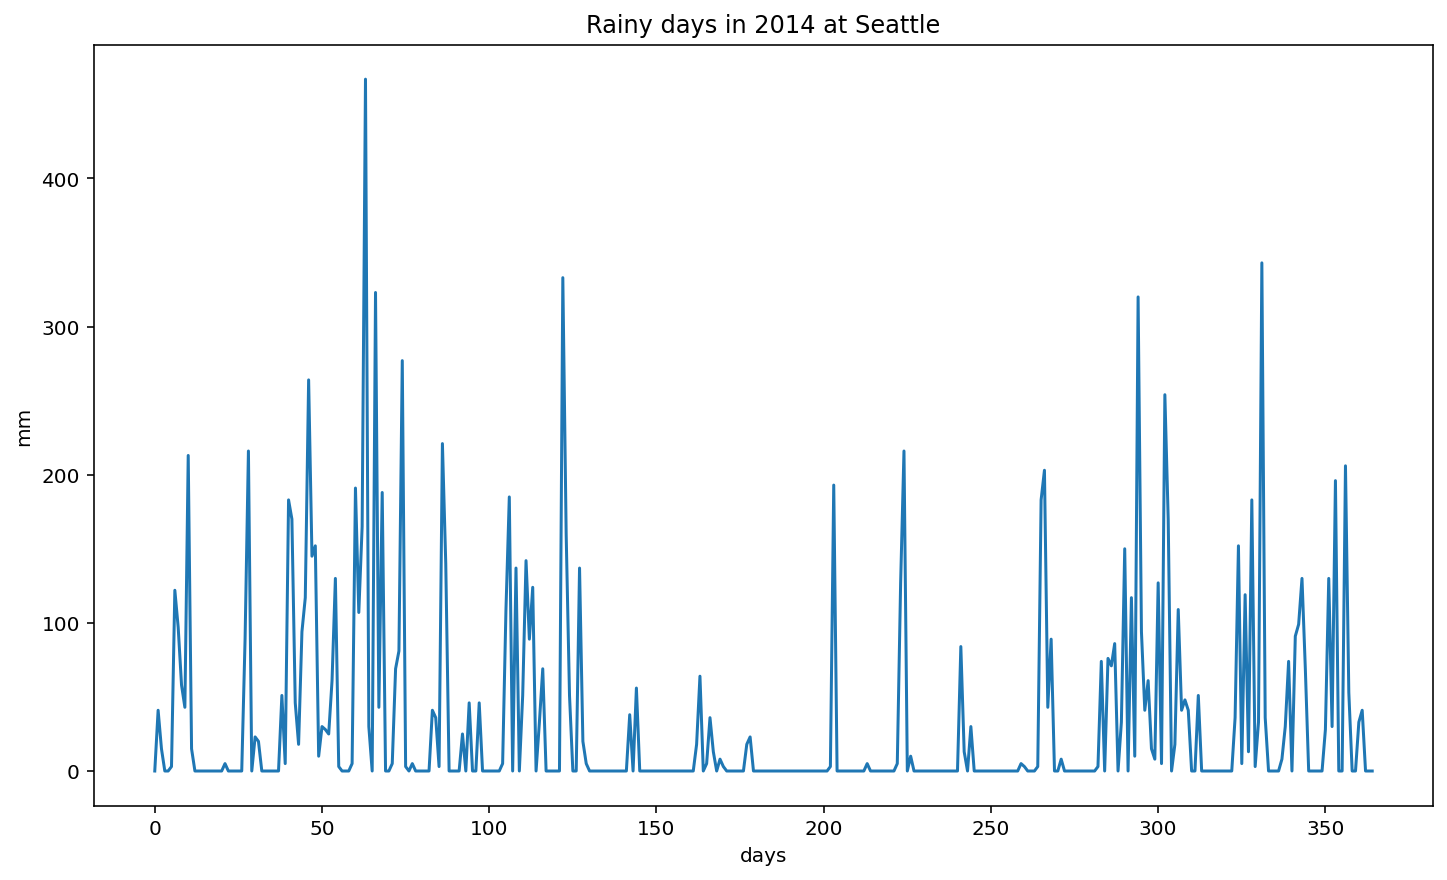

In [301]:
# lets first visualize
import matplotlib.pyplot as plt
plt.plot(rainfall)
plt.xlabel('days')
plt.ylabel('mm')
plt.title('Rainy days in 2014 at Seattle')
plt.savefig('rainy.png')
# only when in a terminal
plt.show()

In [302]:
# How many rainy days
rainy_days = np.sum(rainfall>0)
print(rainy_days)

150


In [303]:
# average precipitation on the year
ave_precip_year = np.mean(rainfall)
print(ave_precip_year)

33.775342465753425


In [304]:
# average precipitation on the rainy days
ave_precip_rainy = np.mean(rainfall[rainfall>0])
print(ave_precip_rainy)

82.18666666666667


In [305]:
# let's build meaninful masks
year = np.arange(1, 366)
january = year < 32
rainy = rainfall > 0

In [307]:
year[:5], january[:5], rainy[:5]

(array([1, 2, 3, 4, 5]),
 array([ True,  True,  True,  True,  True]),
 array([False,  True,  True, False, False]))

In [308]:
# mean precipitation on January
mean_jan = np.mean(rainfall[january])
print(mean_jan)

30.322580645161292


In [309]:
# mean precipitation on January on the rainy days
mean_jan_rainy = np.mean(rainfall[january & rainy])
print(mean_jan_rainy)

72.3076923076923


## With Pandas

In [324]:
# We start to convert to a pandas Series
s = pd.Series(rainfall)
s

0       0
1      41
2      15
3       0
4       0
       ..
360    33
361    41
362     0
363     0
364     0
Length: 365, dtype: int64

In [325]:
s.index = pd.to_datetime(s.index, unit='D', origin=pd.Timestamp('1/1/2014'))
s

2014-01-01     0
2014-01-02    41
2014-01-03    15
2014-01-04     0
2014-01-05     0
              ..
2014-12-27    33
2014-12-28    41
2014-12-29     0
2014-12-30     0
2014-12-31     0
Length: 365, dtype: int64

In [326]:
s = s.resample('m').max()
s

2014-01-31    216
2014-02-28    264
2014-03-31    467
2014-04-30    185
2014-05-31    333
2014-06-30     64
2014-07-31    193
2014-08-31    216
2014-09-30    203
2014-10-31    320
2014-11-30    343
2014-12-31    206
Freq: M, dtype: int64

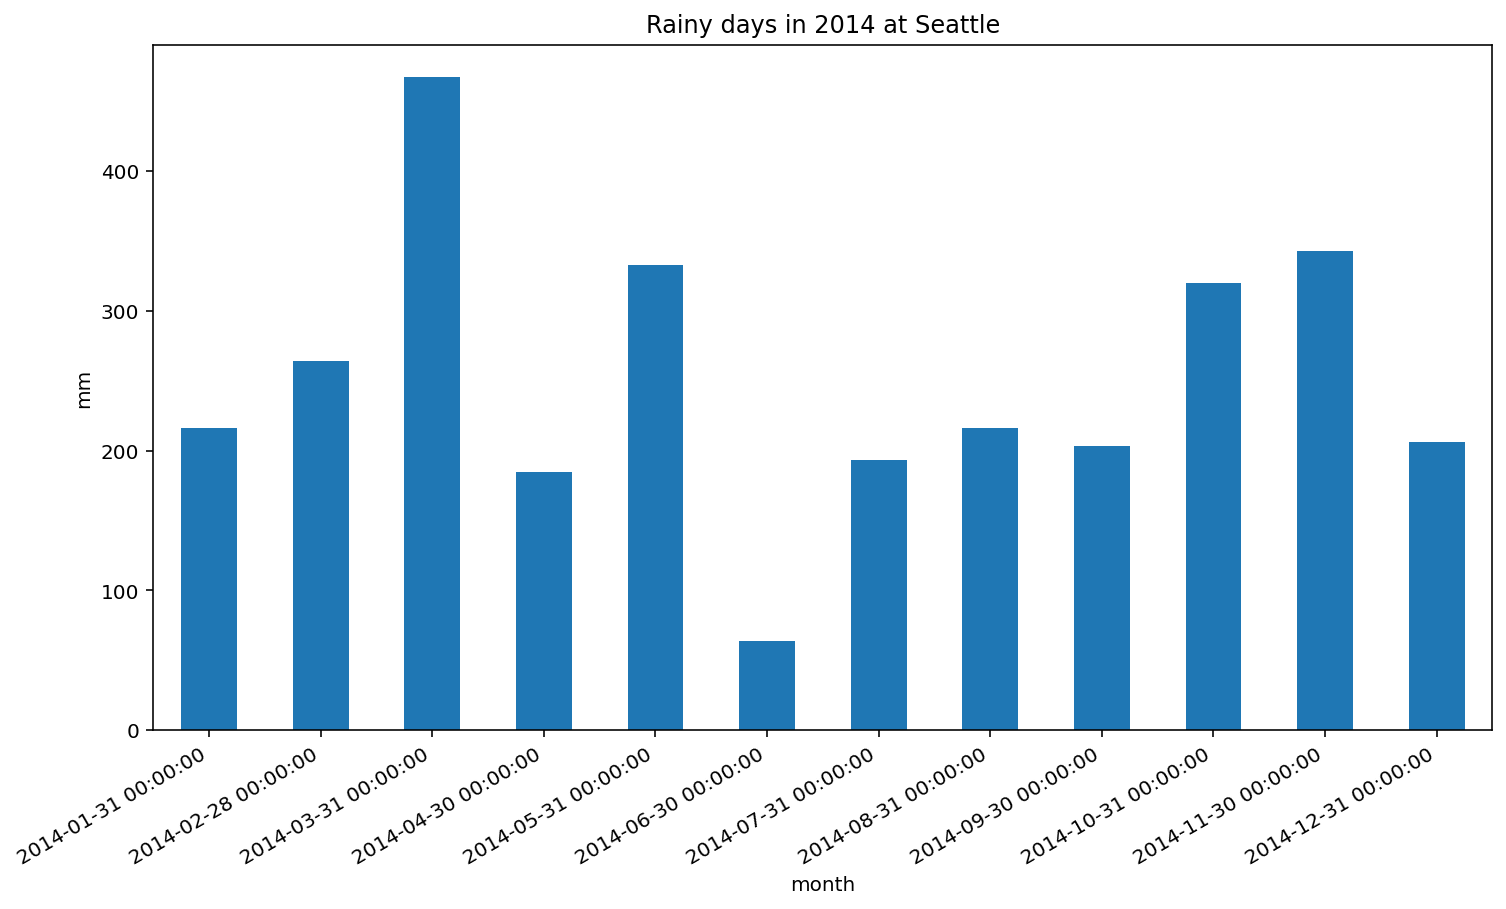

In [328]:
s.plot.bar()
plt.xlabel('month')
plt.ylabel('mm')
plt.title('Rainy days in 2014 at Seattle')
fig = plt.gcf()
fig.autofmt_xdate()
plt.show() # if in a terminal

# Numpy structured array

In [329]:
names = ['alice', 'bob', 'charlie']
height = [166, 180, 170]
weight = [55, 80, 75]

In [331]:
a = np.zeros((1,3),dtype=[('name', np.str, 8),('height', np.int16), ('weight', np.int16)])
a['name'] = names
a['height'] = height
a['weight'] = weight

In [332]:
a

array([[('alice', 166, 55), ('bob', 180, 80), ('charlie', 170, 75)]],
      dtype=[('name', '<U8'), ('height', '<i2'), ('weight', '<i2')])

In [334]:
print(repr(a))

array([[('alice', 166, 55), ('bob', 180, 80), ('charlie', 170, 75)]],
      dtype=[('name', '<U8'), ('height', '<i2'), ('weight', '<i2')])


In [335]:
a['weight'] > 60

array([[False,  True,  True]])

In [336]:
a[a['weight'] > 60]

array([('bob', 180, 80), ('charlie', 170, 75)],
      dtype=[('name', '<U8'), ('height', '<i2'), ('weight', '<i2')])

In [337]:
a[a['weight'] > 60]['name']

array(['bob', 'charlie'], dtype='<U8')

## References
1. Exercises: https://github.com/rougier/numpy-100
2. Vectorization: https://github.com/rougier/from-python-to-numpy
3. Matplotlib cheatsheet: https://github.com/matplotlib/cheatsheets

# Pandas
## References
1. Doc IO tools: https://pandas.pydata.org/pandas-docs/stable/user_guide/io.html
2. Cheatsheet: https://pandas.pydata.org/Pandas_Cheat_Sheet.pdf

## Series

In [341]:
p = pd.Series([18, 35, 42, 12])
p

0    18
1    35
2    42
3    12
dtype: int64

In [342]:
p.array # p.values should no more be used

<PandasArray>
[18, 35, 42, 12]
Length: 4, dtype: int64

In [343]:
p.index

RangeIndex(start=0, stop=4, step=1)

In [344]:
p.loc[0]# We can access data by index

18

In [346]:
p1 = pd.Series([13, 56, 43], index=['alice', 'bob', 'julie'], dtype=np.int64)
p1

alice    13
bob      56
julie    43
dtype: int64

In [347]:
p1.loc['alice'] # we access data by their index

13

### Different ways to create a Series

In [351]:
s1 = pd.Series([12, 15, 20])
s2 = pd.Series([12, 15, 20], index=['a', 'b', 'c'])
s3 = pd.Series({'a': 12, 'b': 15, 'c': 20})
s4 = pd.Series({'a': 12, 'b': 15, 'c': 20}, index=['a', 'c', 'd'])
print("s1 = \n", s1, "\ns2 = \n", s2, "\ns3 = \n", s3, "\ns4 = \n", s4)

s1 = 
 0    12
1    15
2    20
dtype: int64 
s2 = 
 a    12
b    15
c    20
dtype: int64 
s3 = 
 a    12
b    15
c    20
dtype: int64 
s4 = 
 a    12.0
c    20.0
d     NaN
dtype: float64


### Default Pandas dtype

In [352]:
pd.Series([1]).dtype

dtype('int64')

In [353]:
pd.Series([1.1]).dtype

dtype('float64')

In [354]:
pd.Series(['x']).dtype

dtype('O')

In [355]:
pd.Series([1], dtype=np.int8).dtype

dtype('int8')

### Extension dtypes

In [357]:
s = pd.Series([30, 35, 20], index=['alice', 'bob', 'julie'])
s.loc['alice'], s.iloc[0], s.iloc[-1]

(30, 30, 20)

### Indexing
https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html

In [365]:
data = pd.Series({})
data.loc['alice'] = 0
data.loc['bob'] = 1
data.loc['a'] = 0
data.drop('a')
data.loc['x'] = 45
data

<ipython-input-365-be74dd812386>:1: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  data = pd.Series({})


alice     0
bob       1
a         0
x        45
dtype: int64